In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from PIL import Image
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from joblib import dump, load
import string
ps = PorterStemmer()

In [16]:
final_stopwords_list = list(fr_stop)
tfidfvectorizer = TfidfVectorizer(analyzer='word', stop_words=final_stopwords_list)
df = pd.read_csv(r"csv/preprocessed_csv/cleared_train.csv", index_col=0)
df

,review,label,clear_review
0,Si vous cherchez du cinéma abrutissant à tous ...,0,si cherch cinem abrut tous étagesnai aucun peu...
1,Trash retrash et reretrash Une horreur sans no...,0,trash retrash reretrash horreur san nom imagin...
2,Et si dans les 5 premières minutes du film la ...,0,si 5 premi minut film pathet maquet train fend...
3,Mon dieu Quelle métaphore filée Je suis abas...,0,dieu quel métaphor fil abasourd réel ici a mét...
4,Premier film de la saga Kozure Okami Le Sabre ...,1,premi film sag kozur okam sabr vengeanc tres b...
...,...,...,...
159995,Un rythme bien trop lent et un Ashton Kutcher ...,0,rythm bien trop lent ashton kutch bien trop nul
159996,Monsieur Duchovny vous êtes aussi piètre acteu...,0,monsieur duchovny auss pietr acteur réalis tou...
159997,Complètement différent des films de la série C...,1,complet différent film ser conjuring non sappa...
159998,Alors franchement pour le moment cest le meill...,1,alor franch moment cest meilleur film noël act...


In [17]:
# data split train / test
X = df['clear_review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# dataframe train
data_train = pd.DataFrame(columns=['clear_review', 'label'])
data_train['clear_review'] = X_train.values
data_train['label'] = y_train.values

# dataframe test
data_test = pd.DataFrame(columns=['clear_review', 'label'])
data_test['clear_review'] = X_test.values
data_test['label'] = y_test.values



In [20]:
x = df['clear_review'] == np.nan
(x == True).sum()

0

In [10]:
# vectoriz
vectorized_train = tfidfvectorizer.fit_transform(X_train)
vectorized_test = tfidfvectorizer.transform(X_test)

C:\Users\ranco\miniconda3\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  warnings.warn(


ValueError: np.nan is an invalid document, expected byte or unicode string.

## Preprocessing

In [14]:
#Load csv
df = pd.read_csv("csv/train.csv")

In [15]:
#remove useless column and rename them
df = df.drop(['film-url'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.rename(columns={"polarity": "label"})
df.head()
#----------------------------------

,review,label
0,Si vous cherchez du cinéma abrutissant à tous ...,0
1,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,"Et si, dans les 5 premières minutes du film, l...",0
3,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [16]:
#stopword
nltk.download('stopwords')
stopWords = set(stopwords.words('french'))
stemmer = SnowballStemmer('french')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#preprocessING
def clearData(dfColumn):
    dfColumn["review"] = dfColumn["review"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    dfColumn["review"] = dfColumn["review"].apply(lambda x: re.sub(r'_', ' ', x))
    dfColumn['clear_review'] = dfColumn['review'].apply(lambda x: x.lower())
    dfColumn["clear_review"] = dfColumn["clear_review"].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopWords)]))
    dfColumn["clear_review"] = dfColumn["clear_review"].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()])) # Stem every word.
clearData(df)



## Training du modele

In [18]:
#data split train / test
X = df['clear_review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
#dataframe train
data_train = pd.DataFrame(columns=['clear_review','label'])
data_train['clear_review'] = X_train.values
data_train['label'] = y_train.values
data_train.shape

(128000, 2)

In [20]:
#dataframe test
data_test = pd.DataFrame(columns=['clear_review','label'])
data_test['clear_review'] = X_test.values
data_test['label'] = y_test.values
data_test.shape

(32000, 2)

In [21]:
#vectorization
final_stopwords_list = list(fr_stop)
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words=final_stopwords_list)

vectorized_train = tfidfvectorizer.fit_transform(X_train)
vectorized_test = tfidfvectorizer.transform(X_test)
#-------------------------------------------------------


C:\Users\ranco\miniconda3\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  warnings.warn(


In [22]:
#model fitting 
rfClassifier = RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
rfClassifier.fit(vectorized_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)

In [23]:
#model scoring 
rfPreds = rfClassifier.score(vectorized_test, y_test)
rfPreds

0.89459375

## Load and save

In [24]:
#save
dump(rfClassifier, "models/model_nlp_n_estimator_400_criterion_entropy_random_state_0.joblib")

['models/model_nlp_n_estimator_400_criterion_entropy_random_state_0.joblib']

In [10]:
#load
rfClassifier = load("models/model_nlp_n_estimator_400_criterion_entropy_random_state_0.joblib")

## Prediction et determination de la personne dans le tweet

In [101]:
#Preprocessing tweet data
df_tweet = pd.read_csv("csv/tweets.csv")
clearData(df_tweet)
vectorized_tweets = tfidfvectorizer.transform(df_tweet["clear_review"])

In [26]:
#model scoring on tweet
rfPreds_tweet = rfClassifier.score(vectorized_tweets, df_tweet["label"])
rfPreds_tweet

KeyError: 'label'

In [102]:
#model prediction on tweet
rfPreds_tweet = rfClassifier.predict(vectorized_tweets)
rfPreds_tweet

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

## creating df for graph

In [103]:
df_final = df_tweet
df_final["predicted"] = rfPreds_tweet
df_final["candidat"] = ''

In [104]:
searchList = ["zemmour", "macron", "pécresse", "mélenchon", "jadot", "dupont","aignan", "arthaud", "hidalgo", "poutou", "pen", "roussel", "lassalle"]
df_final["candidat"] = df_final["review"].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() in searchList]))
df_final["candidat"] = df_final["candidat"].apply(lambda x: re.sub('([a-zé]* .*)|^$', 'None', x))
df_final["candidat"] = df_final["candidat"].apply(lambda x: re.sub('dupont|aigan', 'dupont-aigan', x))
df_final["candidat"] = df_final["candidat"].apply(lambda x: re.sub('pen', 'le pen', x))

In [105]:
df_final

,review,clear_review,predicted,candidat
0,Second tour pour Eric Zemmour tout se passe co...,second tour eric zemmour tout pass comm prévu ...,1,zemmour
1,Au Portugal Éric Zemmour a cartonné auprès de ...,portugal éric zemmour a carton aupres diaspor ...,1,zemmour
2,Mediavenir La tracklist de Valérie Pécresse a...,mediaven tracklist valer pécress a fuit 1 mauv...,0,pécresse
3,Emmanuel Macron na pas agi dans lintérêt de l...,emmanuel macron na agi lintérêt franc quand ce...,0,macron
4,Joss66140 davidlisnard Nouv Energie TeamLisnar...,joss66140 davidlisnard nouv energ teamlisnard ...,0,zemmour
...,...,...,...,...
1795,Rappel les clubs échangistes sont restés ouve...,rappel club échang rest ouvert pend tout confi...,0,lassalle
1796,FLASH Jean Lassalle donne 10 euros à Anne Hi...,flash jean lassall don 10 euros anne hidalgo y...,0,None
1797,Rappel les clubs échangistes sont restés ouve...,rappel club échang rest ouvert pend tout confi...,0,lassalle
1798,Rappel les clubs échangistes sont restés ouve...,rappel club échang rest ouvert pend tout confi...,0,lassalle


In [106]:
df_final = df_final.sort_values(by=['candidat'])
df_final

,review,clear_review,predicted,candidat
899,da73468265 Merci Monsieur DupontAignan de vous...,da73468265 merc monsieur dupontaignan battr dr...,1,None
678,TAÏWANJe métonne que von der Leyen BHL Jadot ...,taïwanj méton von der leyen bhl jadot hidalgo ...,0,None
679,Le vendredi 8 avril nous étions traités damis...,vendred 8 avril trait dam poutin intouch lund ...,0,None
681,TAÏWANJe métonne que von der Leyen BHL Jadot ...,taïwanj méton von der leyen bhl jadot hidalgo ...,0,None
682,celiamebroukine Medinrecords Mediapart mathieu...,celiamebroukin medinrecord mediapart mathieu p...,0,None
...,...,...,...,...
98,chumunue GG RMC Olivier Truchot Vous ne devez ...,chumunu gg rmc olivi truchot dev bien écout ce...,0,zemmour
99,Je me souviens être suspendu dantenne des GGRM...,souvien être suspendu danten ggrmc car proch z...,0,zemmour
101,Zemmour quand il a vu quil passait pas au deux...,zemmour quand a vu quil pass deuxièmetour pres...,0,zemmour
841,Un sondage Ifop montre donc que les cathodique...,sondag ifop montr donc cathod plus vot lextrêm...,1,zemmour


In [124]:
df_final.to_csv(r'csv\df_final.csv')

In [107]:
df_zemmour = df_final.loc[df_final['candidat'] == 'zemmour']
df_macron = df_final.loc[df_final['candidat'] == 'macron']
df_pecresse = df_final.loc[df_final['candidat'] == 'pécresse']
df_melenchon = df_final.loc[df_final['candidat'] == 'mélenchon']
df_jadot = df_final.loc[df_final['candidat'] == 'jadot']
df_dupont_aignan = df_final.loc[df_final['candidat'] == 'dupont-aigan']
df_arthaud = df_final.loc[df_final['candidat'] == 'arthaud']
df_hidalgo = df_final.loc[df_final['candidat'] == 'hidalgo']
df_poutou = df_final.loc[df_final['candidat'] == 'poutou']
df_lepen = df_final.loc[df_final['candidat'] == 'le pen']
df_roussel = df_final.loc[df_final['candidat'] == 'roussel']
df_lassalle = df_final.loc[df_final['candidat'] == 'lassalle']
df_null = df_final.loc[df_final['candidat'] == 'None']

In [108]:
df_macron

,review,clear_review,predicted,candidat
189,Macron ne doit pas échapper au McKinseyGate T...,macron doit échapp mckinseygat touscontremacro...,0,macron
255,CaVous Emmanuel Macron rappel que NON les étud...,cavous emmanuel macron rappel non étud supérie...,0,macron
256,SephihaVidal millerofficiel Macron a fait adop...,sephihavidal millerofficiel macron a fait adop...,0,macron
498,Vlà ce qui arrive avec Macron au delà de la va...,vlà arriv macron delà vaccinationil ny a plac ...,1,macron
259,À ceux qui plient sous la pression politique e...,ceux plient sous pression polit social nont to...,1,macron
...,...,...,...,...
892,Nicolas DupontAignan Pas une voix ne doit all...,nicol dupontaignan voix doit aller macron deux...,1,macron
826,Azizibn1 DOchbad Mediavenir MLP officiel Quid ...,azizibn1 dochbad mediaven mlp officiel quid su...,0,macron
893,Nicolas DupontAignan Pas une voix ne doit all...,nicol dupontaignan voix doit aller macron deux...,1,macron
791,electionspresidentielles2022Nicolas DupontAign...,electionspresidentielles2022nicol dupontaignan...,0,macron


In [109]:
def wordcloud(df):
    coms = df
    coms.head()
    list_word = ''
    for s in coms['review']:
        for word in s.split():
            if s not in stopWords:
                list_word+=s

    wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(list_word)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();
    wordcloud.to_file('png/' + df['candidat'].max() + '.png')
    
    

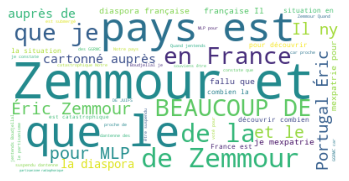

In [110]:
wordcloud(df_zemmour)

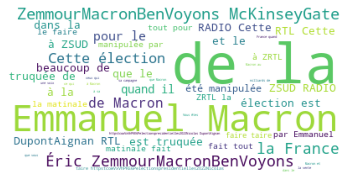

In [111]:
wordcloud(df_macron)

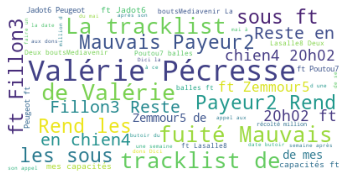

In [112]:
wordcloud(df_pecresse)

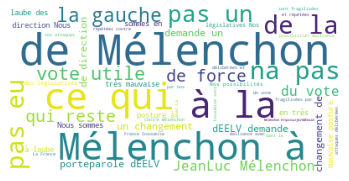

In [113]:
wordcloud(df_melenchon)

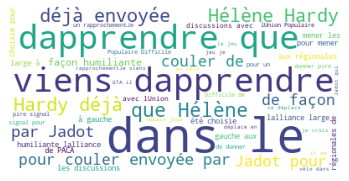

In [114]:
wordcloud(df_jadot)

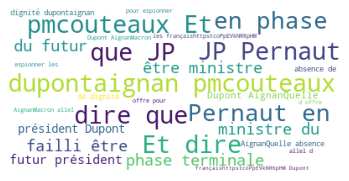

In [115]:
wordcloud(df_dupont_aignan)

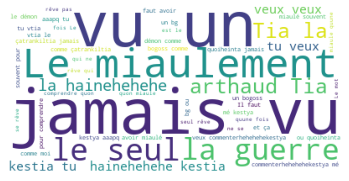

In [116]:
wordcloud(df_arthaud)

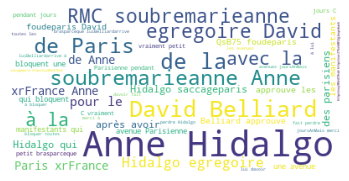

In [117]:
wordcloud(df_hidalgo)

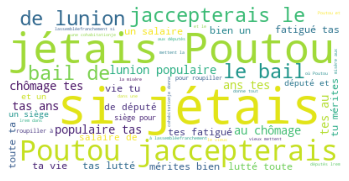

In [118]:
wordcloud(df_poutou)

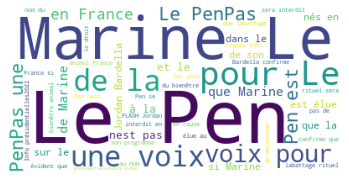

In [119]:
wordcloud(df_lepen)

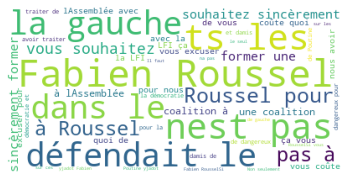

In [120]:
wordcloud(df_roussel)

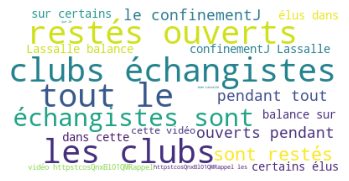

In [121]:
wordcloud(df_lassalle)

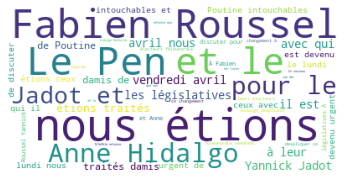

In [123]:
wordcloud(df_null)